# Activity 1

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

## a) y_data vs x_data for different size of data sets, N = 10, 100, 1000
data = signal + noise. Here, signal = $\sin(2\pi x)$ and noise = normal distribution with sigma = $0.3$

In [31]:
def data(N):
    x1 = np.random.uniform(size=N)
    f = np.sin(2*np.pi*x1) + np.random.normal(loc=0, scale=0.3, size=N)
    return x1, f

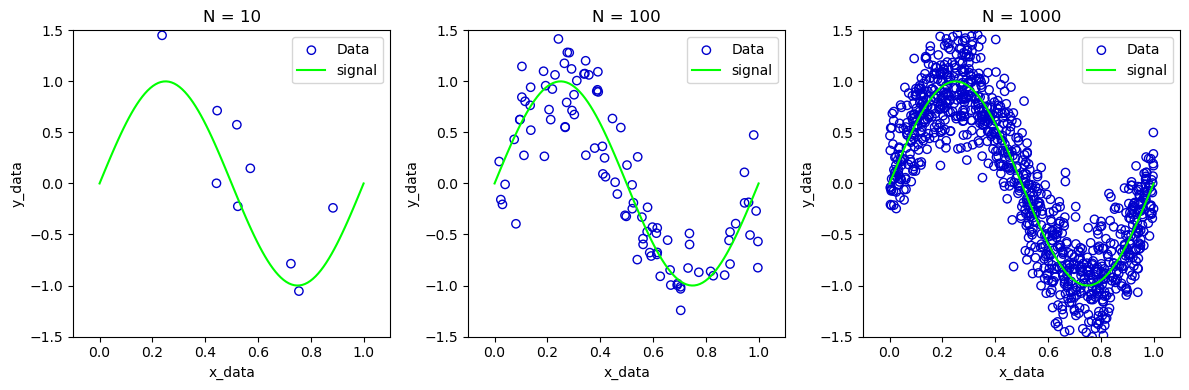

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4)) 
N = [10, 100, 1000] #number of data points

for i, element in enumerate(N): 
    x_data, y_data = data(element)
    x_continuous = np.linspace(0, 1, 100)
    axs[i].scatter(x_data, y_data, facecolors='none', edgecolors='mediumblue', marker='o', label='Data')
    axs[i].plot(x_continuous, np.sin(2*np.pi*x_continuous),c='lime', label='signal')
    axs[i].legend()
    axs[i].set_title(f'N = {element}')
    axs[i].set_xlabel('x_data')
    axs[i].set_ylabel('y_data')
    axs[i].set_xlim([-0.1,1.1])
    axs[i].set_ylim([-1.5, 1.5])

plt.tight_layout()
plt.show()

## b) y_data vs x_data together with polynomial fit
## Analysis - a

In [33]:
def polynomial(x, poly):
    result = 0
    for coeff in poly:
        result = x * result + coeff
    return result

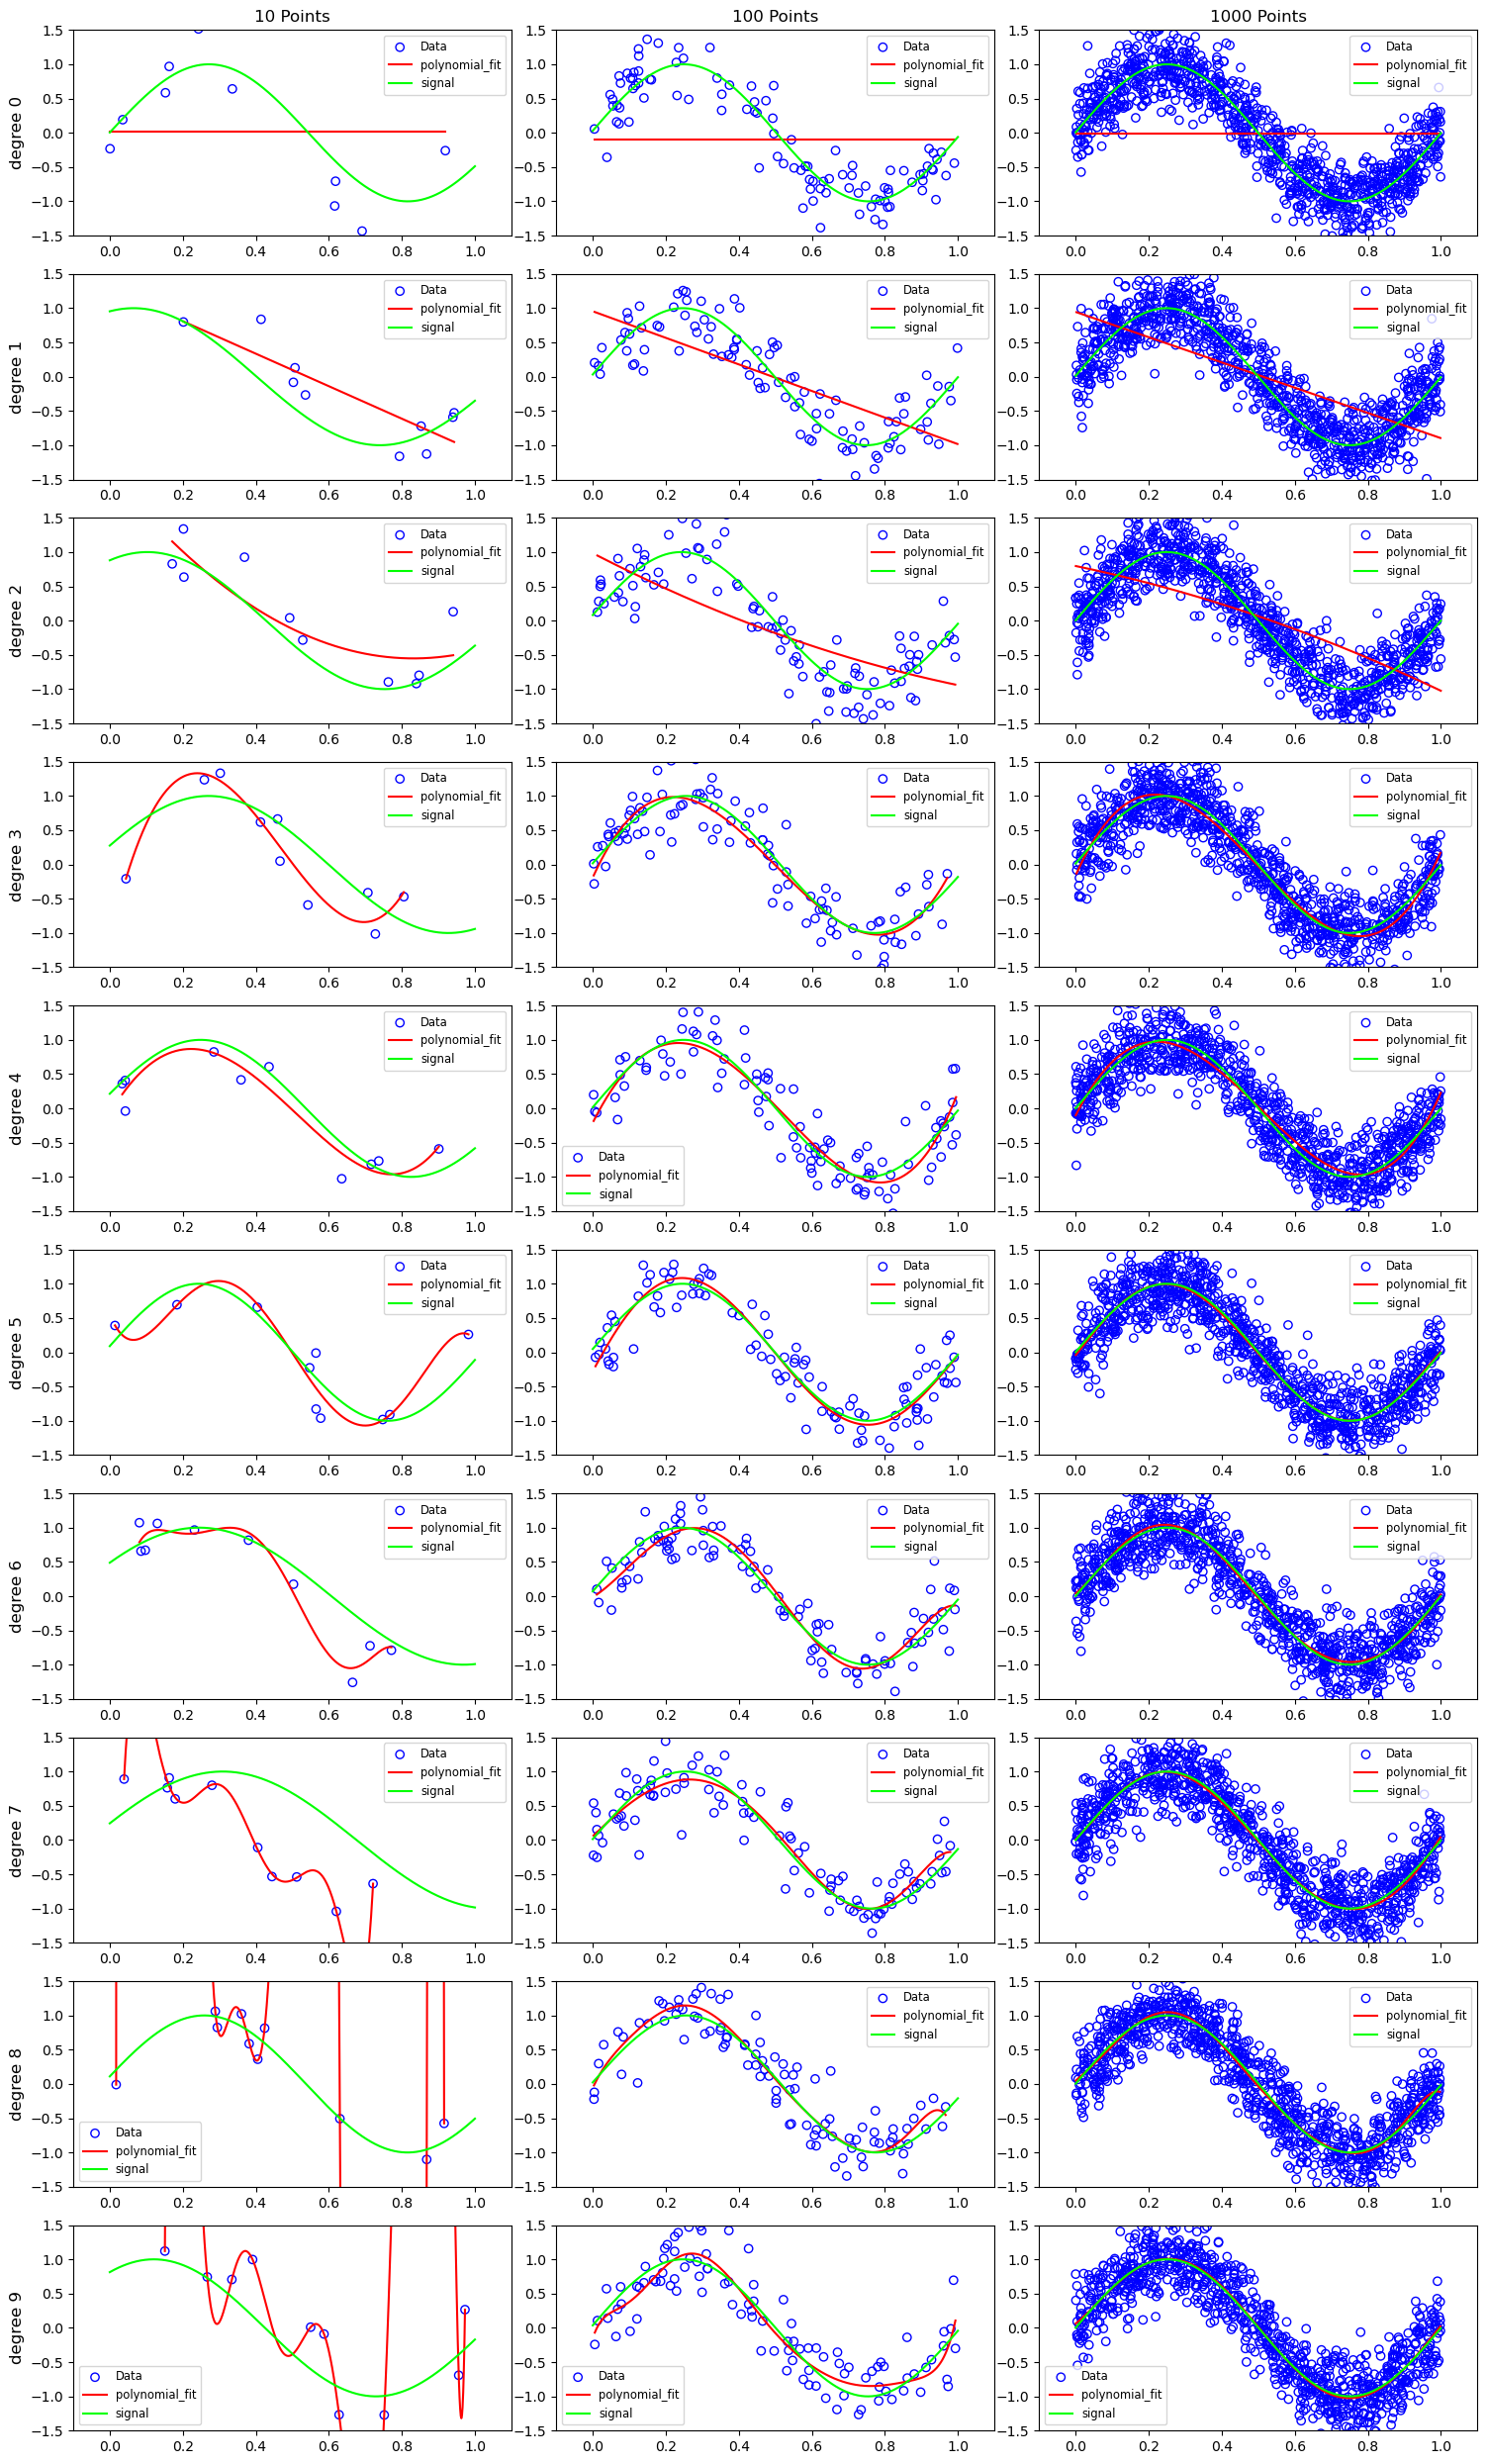

In [61]:
order = np.arange(0,10)
N = [10, 100, 1000]
fig, axs = plt.subplots(len(order), len(N), figsize=(15, 25))

for i, deg in enumerate(order):  # Enumerate over the degree array
    for j, n in enumerate(N):
        x_data, y_data = data(n)
        c = np.polyfit(x_data, y_data, deg)
        x_continuous = np.linspace(x_data.min(), x_data.max(), 500)
        axs[i, j].scatter(x_data, y_data, facecolors='none', edgecolors='blue', marker='o', label='Data')
        axs[i, j].plot(x_continuous, polynomial(x_continuous, c), c='red', label='polynomial_fit')
        axs[i, j].plot(np.linspace(0, 1, 500), np.sin(2*np.pi*x_continuous), c='lime', label='signal')
        #axs[i, j].set_title(f'N = {element}')
        #axs[i, j].set_xlabel('x_data')
        #axs[i, j].set_ylabel('t(target variable)')
        if i == 0:
            axs[i, j].set_title(f"{n} Points", fontsize=12)
        if j == 0:
            axs[i, j].set_ylabel(f"degree {deg}", fontsize=12)
        axs[i, j].legend(fontsize='small', loc='best')
        axs[i, j].set_xlim([-0.1, 1.1])
        axs[i, j].set_ylim([-1.5, 1.5])
        axs[i, j].legend(fontsize='small', loc='best')
        
plt.tight_layout()
plt.show()

## Analysis - b

In [62]:
def deviation(x, y, coeffs):
    return (polynomial(x, coeffs) - y)**2

def E_rms(x, y, coeffs):
    return (np.sum(deviation(x, y, coeffs))/len(x))**0.5

N = [10, 100, 1000]
order = 9

for i, element in enumerate(N):
    x_data, y_data = data(element)
    c = np.polyfit(x_data, y_data, order)
    Error_rms = E_rms(x_data, y_data, c)
    print("E_rms(N =",element,") = ", Error_rms)

E_rms(N = 10 ) =  8.491932243622776e-10
E_rms(N = 100 ) =  0.284975989992737
E_rms(N = 1000 ) =  0.29378712733872314


## Analysis - c

In [63]:
N = 100
order = np.arange(0,10)
x_data, y_data = data(N)
x_train = x_data[75:]
y_train = y_data[75:]
x_test = x_data[:25]
y_test = y_data[:25]
train_rms = np.array([])
test_rms = np.array([])

for i, element in enumerate(order):
    c = np.polyfit(x_data, y_data, element)
    Error_rms_train = E_rms(x_train, y_train, c)
    Error_rms_test = E_rms(x_test, y_test, c)
    #print("E_rms_training(M =",element,") : ", Error_rms_train)
    #print("E_rms_test(M =",element,") : ", Error_rms_test)
    train_rms = np.append(train_rms, Error_rms_train)
    test_rms = np.append(test_rms, Error_rms_test)

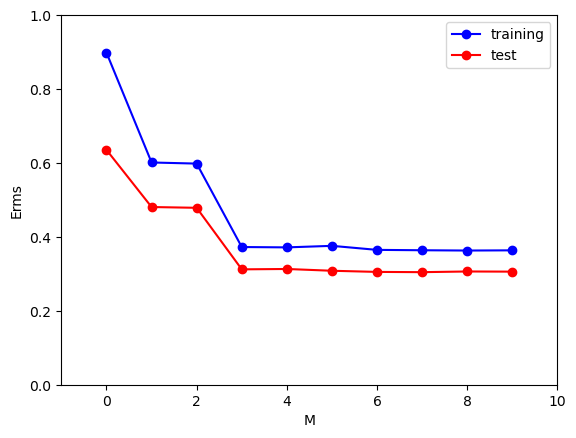

In [64]:
plt.plot(order, train_rms, c = 'blue', marker='o', label="training")
plt.plot(order, test_rms, c ='red', marker='o', label='test')

#plt.plot(order, train_rms, color="blue", linestyle='-', label='training')
#plt.plot(order, test_rms, color="red", linestyle='-', label='test')

plt.xlim(-1, 10)
plt.ylim(0, 1)
plt.xlabel('M')
plt.ylabel('Erms')
plt.legend()
plt.show()

# Activity 2

Linear regression with Regularization : The error function $E(\textbf{w})$ includes a penalty parameter, $\lambda$ to prevent overfitting.
$$
E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^{N} \left( y(x_n, \mathbf{w}) - t_n \right)^2 + \frac{\lambda}{2} \|\mathbf{w}\|^2
$$

## Analysis - 1

### $\ln \lambda = -18$

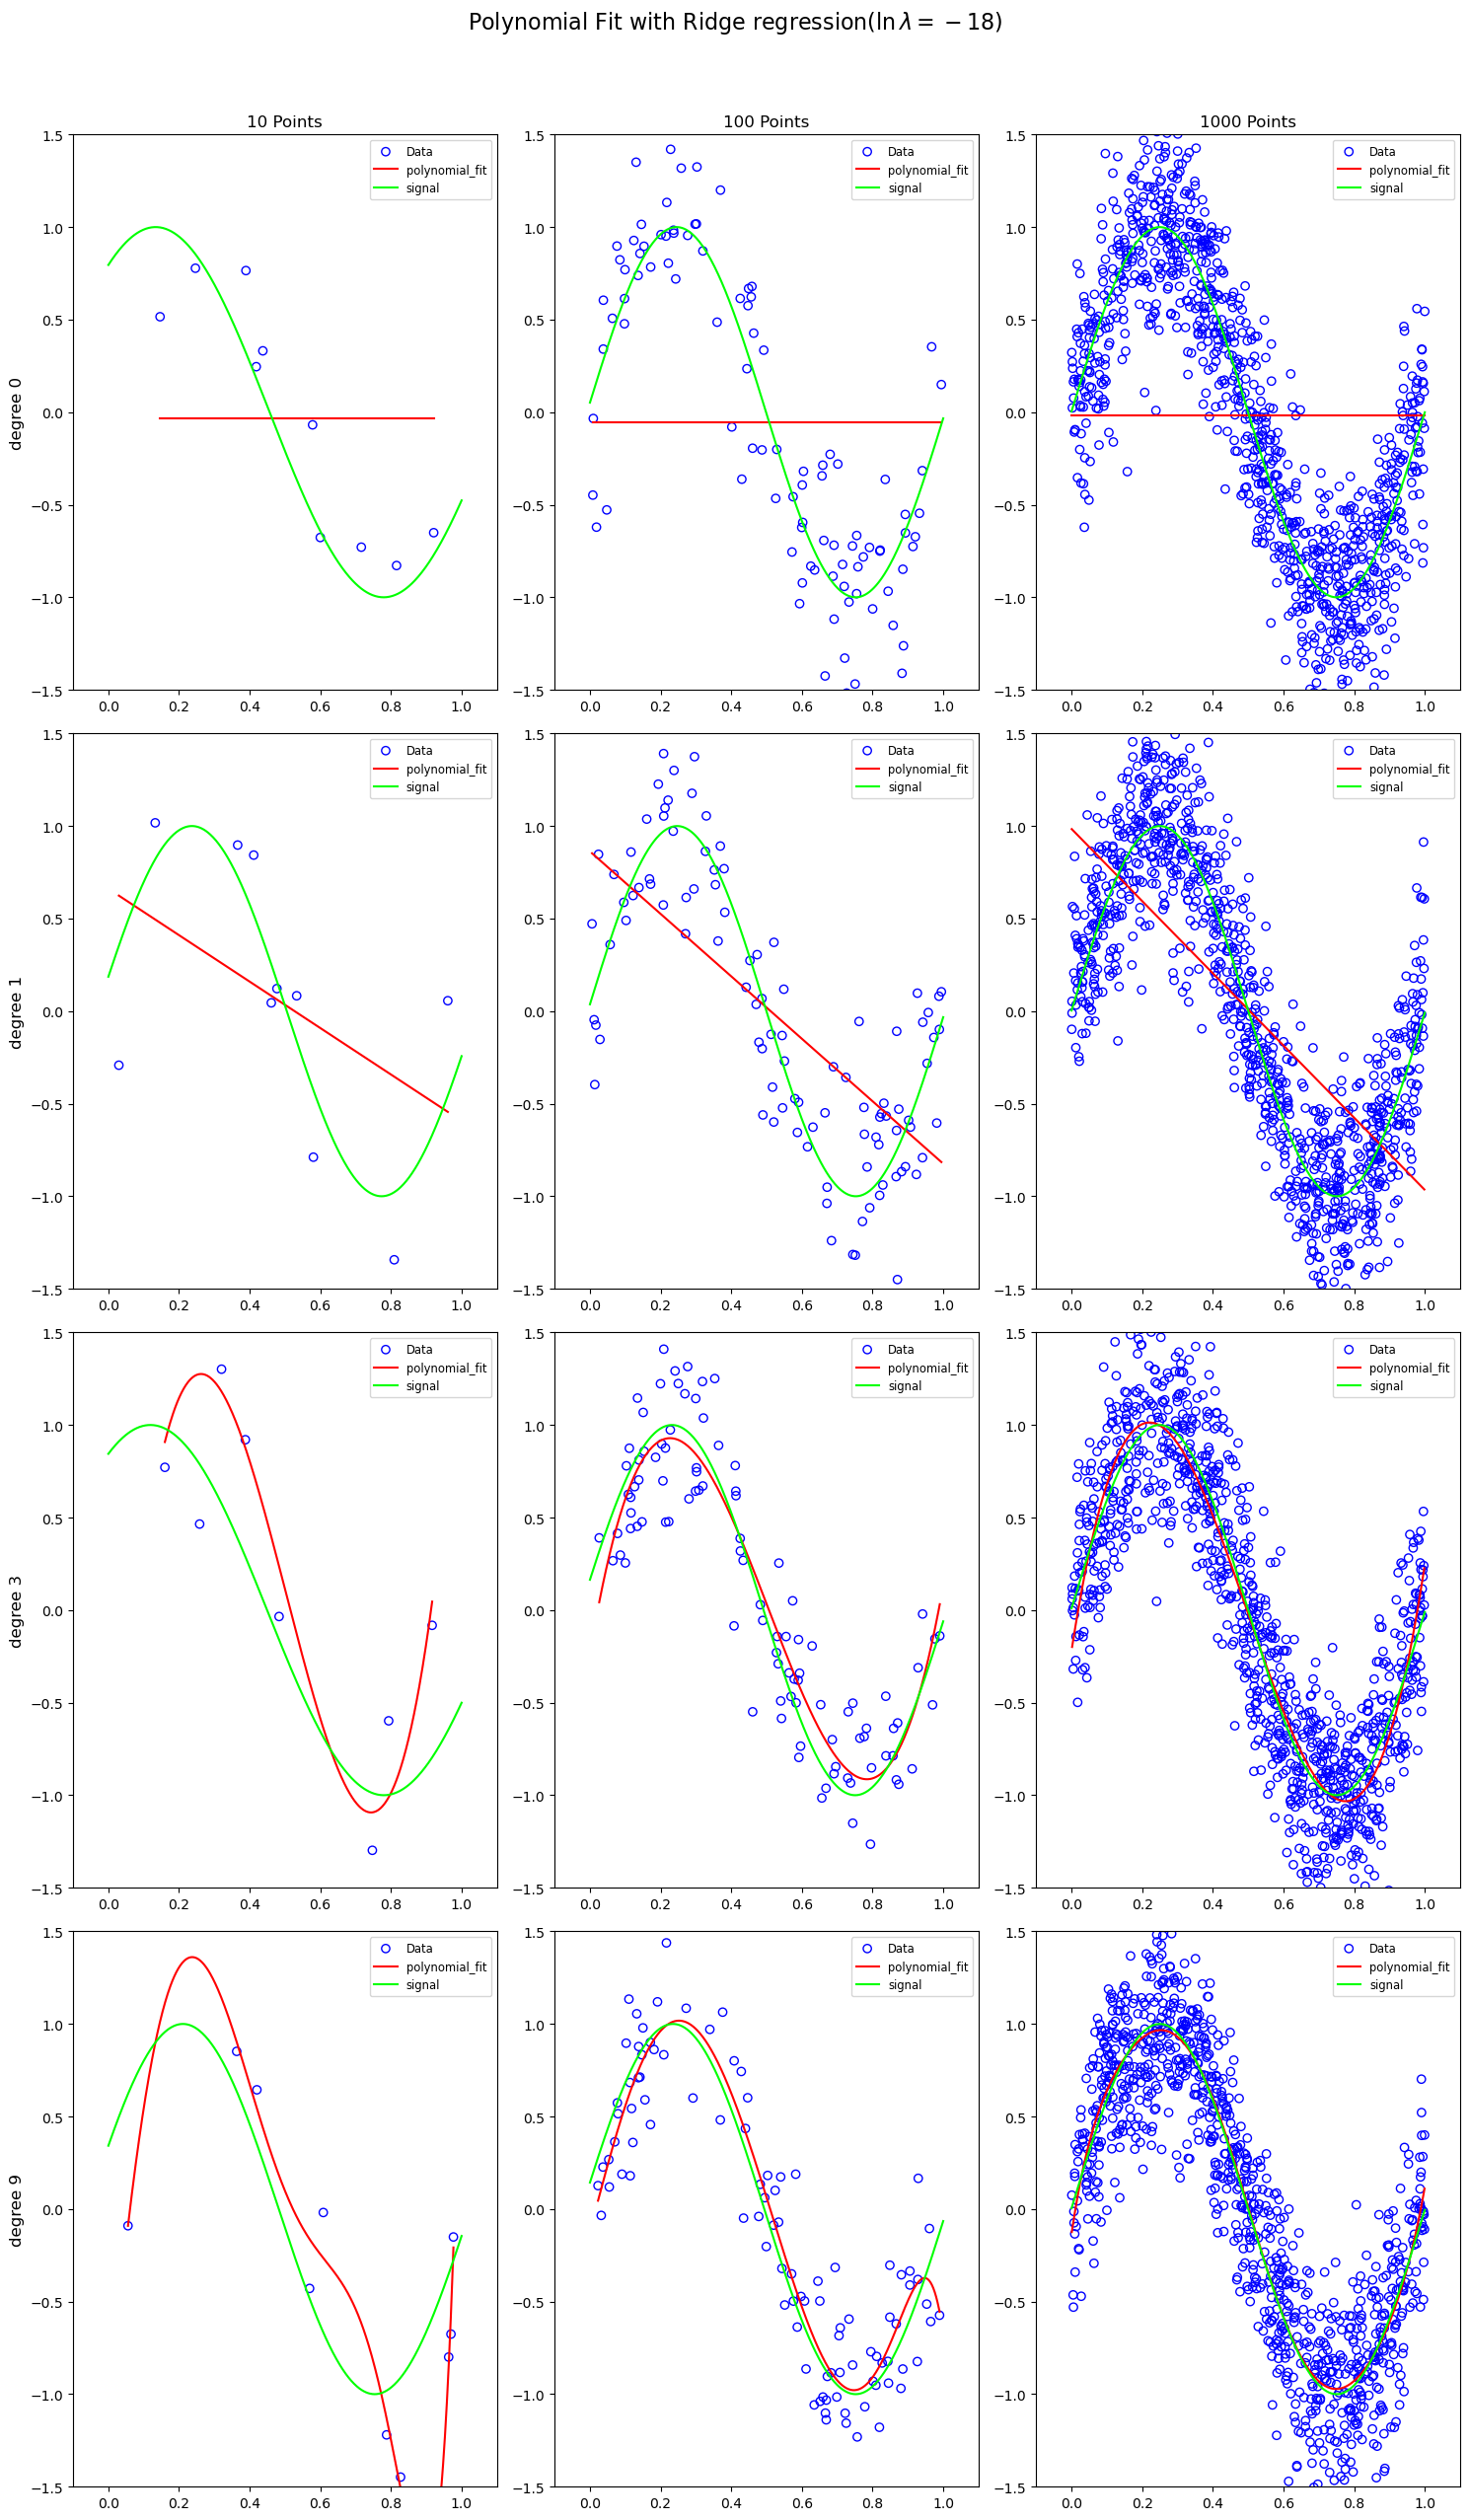

In [79]:
order = np.array([0, 1, 3, 9])
N = [10, 100, 1000]
fig, axs = plt.subplots(len(order), len(N), figsize=(15, 25))

for i, deg in enumerate(order):  # Enumerate over the degree array
    for j, n in enumerate(N):
        x_data, y_data = data(n)
        #ridge fit function needs 2D arrays as arguments. So reshaped x_data and y_data (1D arrays) into 
        # x and y (2D arrays)
        x = x_data.reshape(-1,1)
        y = y_data.reshape(-1,1)
        poly = make_pipeline(PolynomialFeatures(deg), Ridge(alpha=np.exp(-18)))
        Fit = poly.fit(x, y)
        y = Fit.predict(x)
        #x_1D = x.reshape(-1)
        #y_1D = y.reshape(-1)
        #print(x.min())
        x_continuous = np.linspace(x.min(), x.max(), 500) #becomes 1D
        y_fit = Fit.predict(x_continuous.reshape(-1,1)) #Fit.predict needs 2D array, so x_continuous.reshape(-1,1)
        axs[i, j].scatter(x_data, y_data, facecolors='none', edgecolors='blue', marker='o', label='Data')
        axs[i, j].plot(x_continuous, y_fit.reshape(-1), c='red', label='polynomial_fit')
        axs[i, j].plot(np.linspace(0, 1, 500), np.sin(2*np.pi*x_continuous), c='lime', label='signal')
        #axs[i, j].set_title(f'N = {element}')
        #axs[i, j].set_xlabel('x_data')
        #axs[i, j].set_ylabel('t(target variable)')
        if i == 0:
            axs[i, j].set_title(f"{n} Points", fontsize=12)
        if j == 0:
            axs[i, j].set_ylabel(f"degree {deg}", fontsize=12)
        axs[i, j].legend(fontsize='small', loc='best')
        axs[i, j].set_xlim([-0.1, 1.1])
        axs[i, j].set_ylim([-1.5, 1.5])
        axs[i, j].legend(fontsize='small', loc='best')

plt.suptitle("Polynomial Fit with Ridge regression($\ln \lambda = -18$)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
        
        #print(x_continuous.shape)
        #print(x.shape, y.shape)
        #print(x, y)
        

### $\ln \lambda = 0$

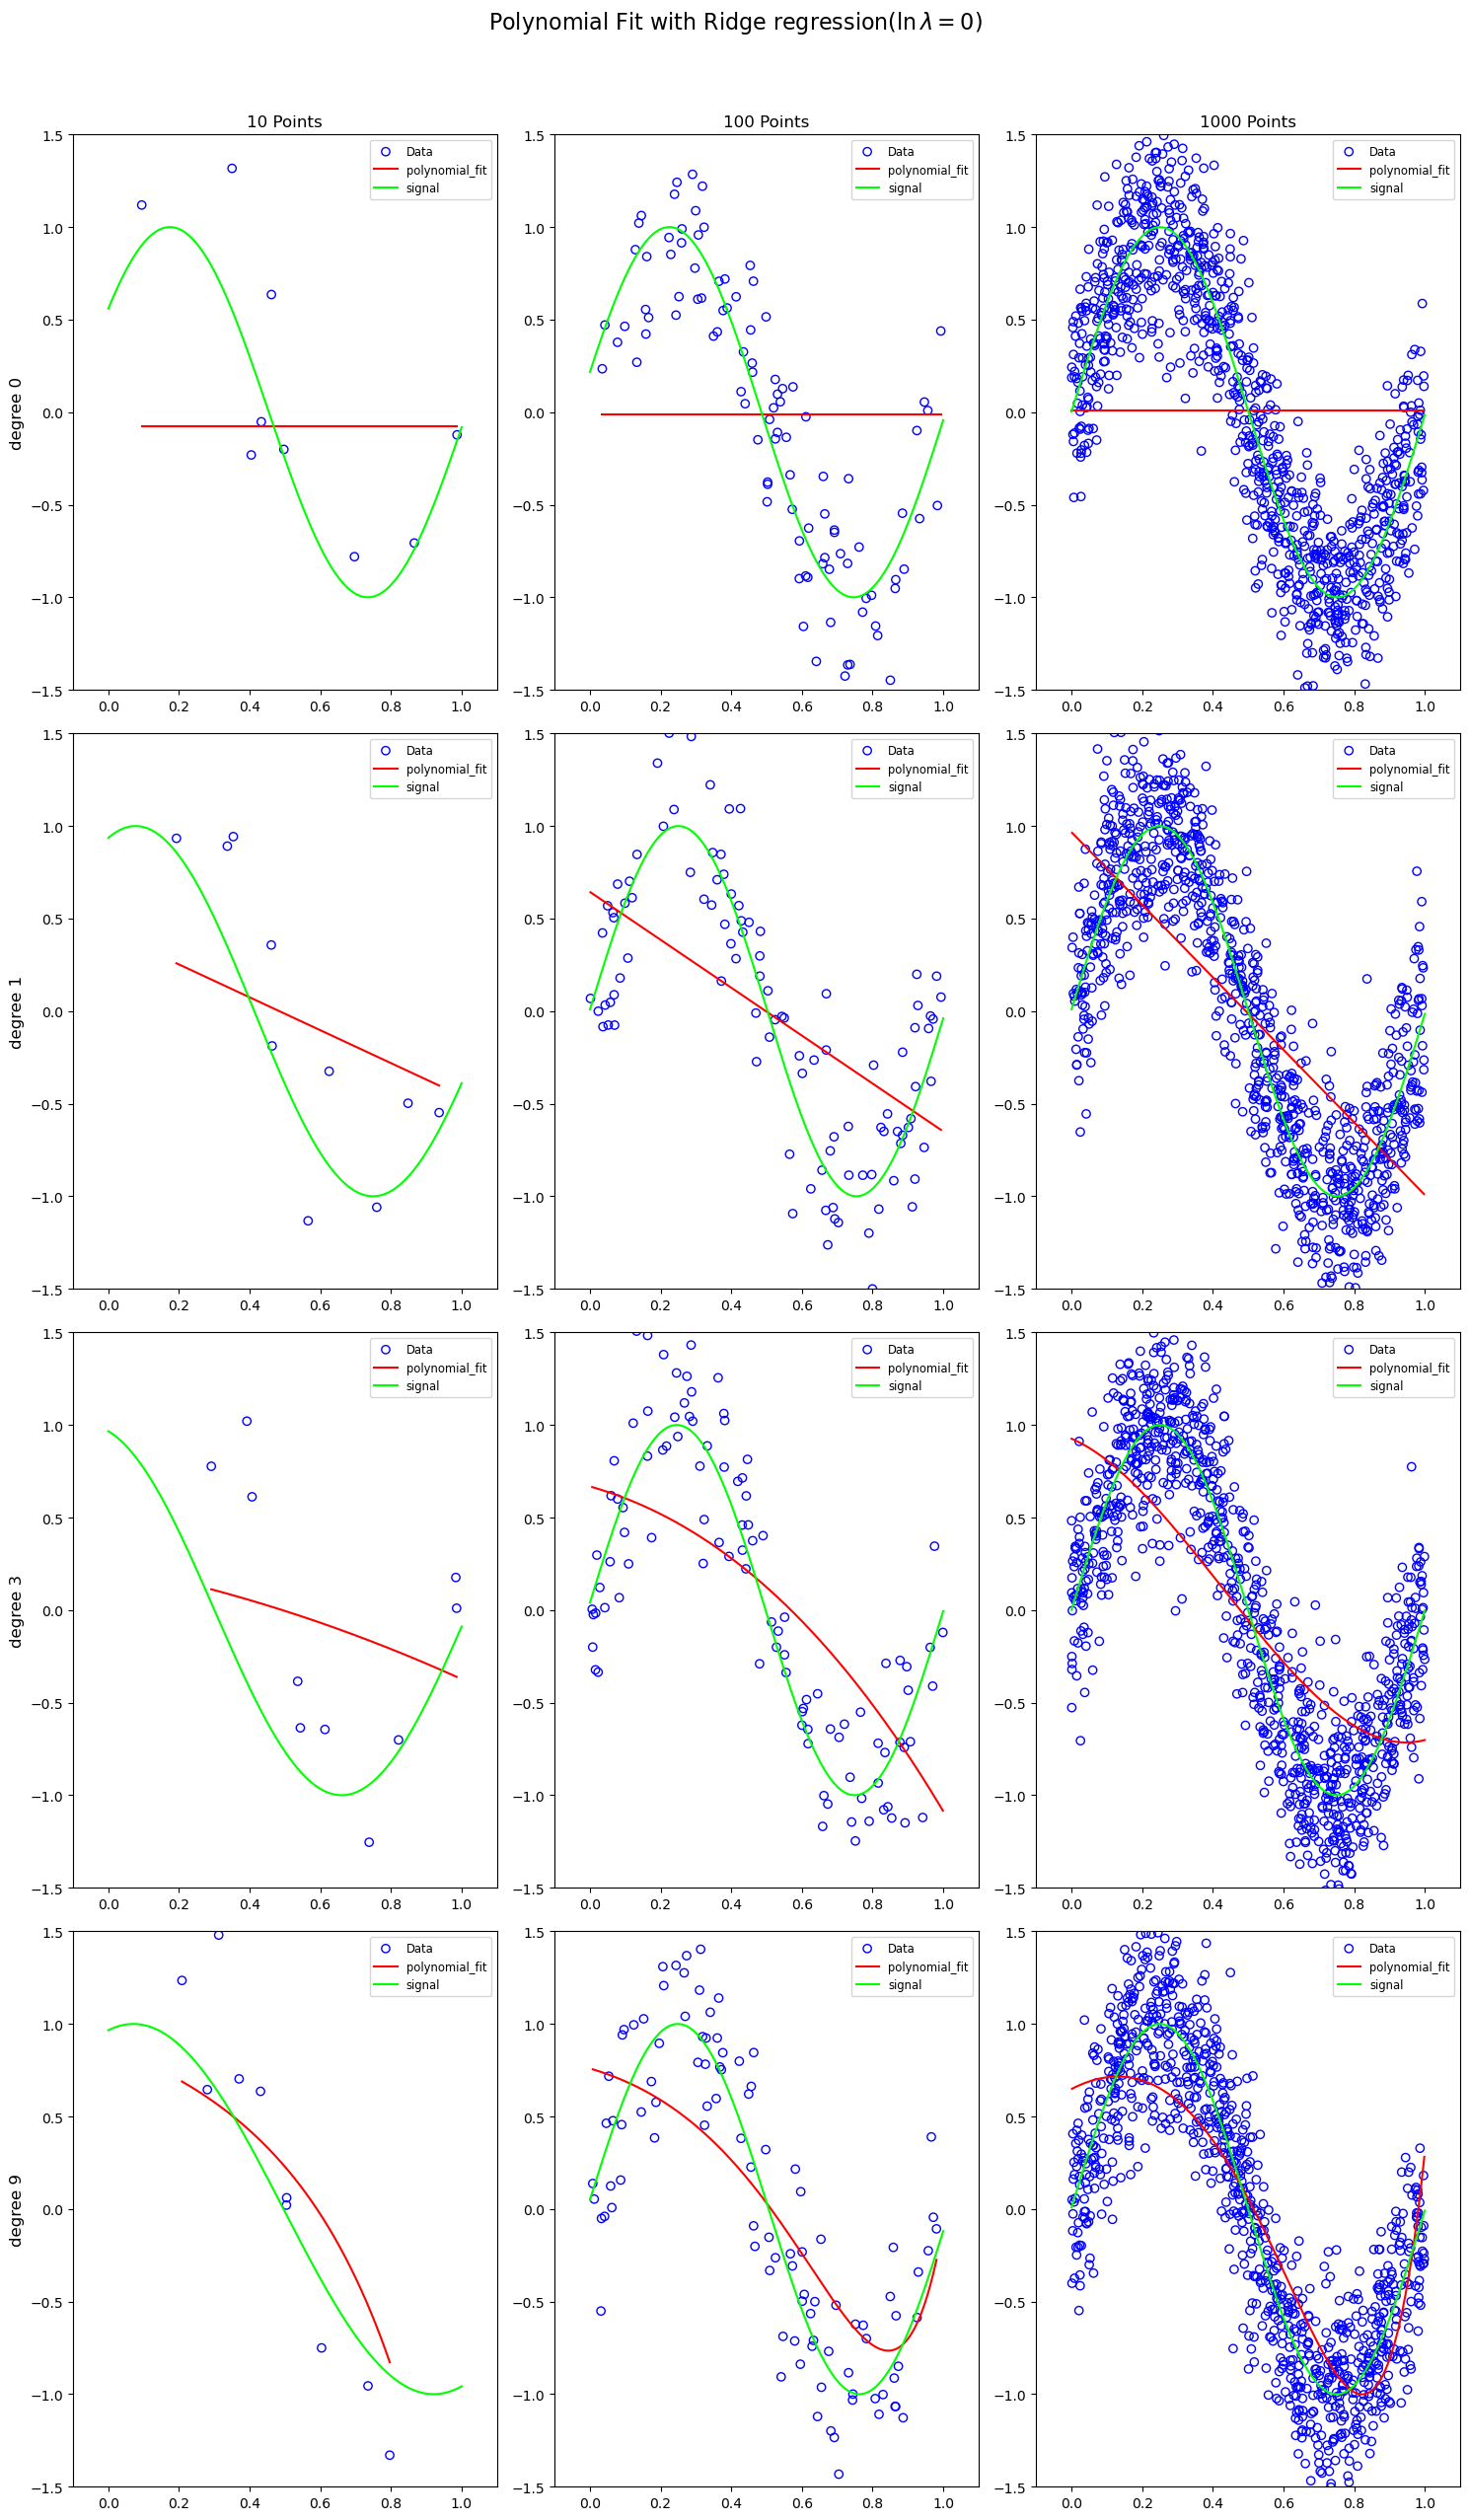

In [80]:
order = np.array([0, 1, 3, 9])
N = [10, 100, 1000]
fig, axs = plt.subplots(len(order), len(N), figsize=(15, 25))

for i, deg in enumerate(order):  # Enumerate over the degree array
    for j, n in enumerate(N):
        x_data, y_data = data(n)
        #ridge fit function needs 2D arrays as arguments. So reshaped x_data and y_data (1D arrays) into 
        # x and y (2D arrays)
        x = x_data.reshape(-1,1)
        y = y_data.reshape(-1,1)
        poly = make_pipeline(PolynomialFeatures(deg), Ridge(alpha=np.exp(0)))
        Fit = poly.fit(x, y)
        y = Fit.predict(x)
        #x_1D = x.reshape(-1)
        #y_1D = y.reshape(-1)
        #print(x.min())
        x_continuous = np.linspace(x.min(), x.max(), 500) #becomes 1D
        y_fit = Fit.predict(x_continuous.reshape(-1,1)) #Fit.predict needs 2D array, so x_continuous.reshape(-1,1)
        axs[i, j].scatter(x_data, y_data, facecolors='none', edgecolors='blue', marker='o', label='Data')
        axs[i, j].plot(x_continuous, y_fit.reshape(-1), c='red', label='polynomial_fit')
        axs[i, j].plot(np.linspace(0, 1, 500), np.sin(2*np.pi*x_continuous), c='lime', label='signal')
        #axs[i, j].set_title(f'N = {element}')
        #axs[i, j].set_xlabel('x_data')
        #axs[i, j].set_ylabel('t(target variable)')
        if i == 0:
            axs[i, j].set_title(f"{n} Points", fontsize=12)
        if j == 0:
            axs[i, j].set_ylabel(f"degree {deg}", fontsize=12)
        axs[i, j].legend(fontsize='small', loc='best')
        axs[i, j].set_xlim([-0.1, 1.1])
        axs[i, j].set_ylim([-1.5, 1.5])
        axs[i, j].legend(fontsize='small', loc='best')

plt.suptitle("Polynomial Fit with Ridge regression($\ln \lambda = 0$)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

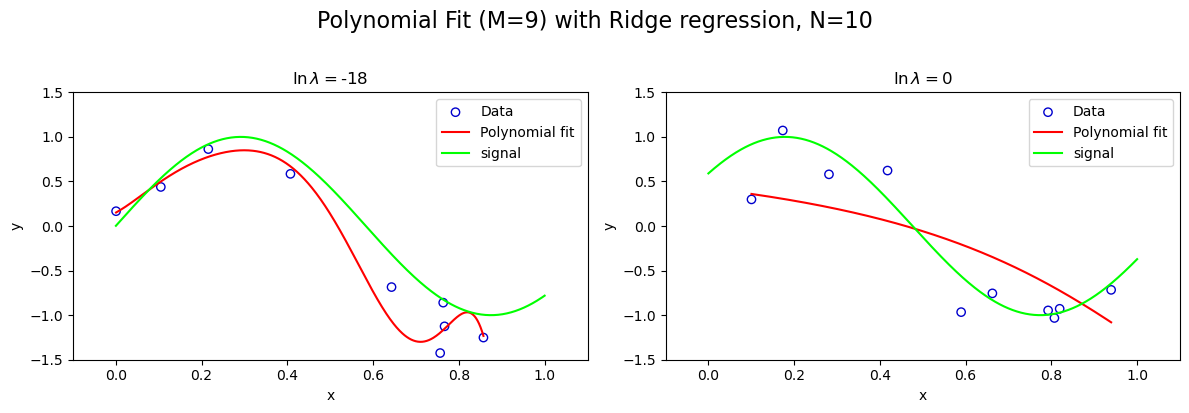

In [98]:
N = 10 #number of data points
ln_lambda = np.array([-18, 0])
fig, axs = plt.subplots(1, len(ln_lambda), figsize=(12, 4)) 
order = 9

for i, element in enumerate(ln_lambda): 
    x_data, y_data = data(N)
    x = x_data.reshape(-1,1)
    y = y_data.reshape(-1,1)
    poly = make_pipeline(PolynomialFeatures(order), Ridge(alpha=np.exp(element)))
    #print(np.exp(element))
    Fit = poly.fit(x, y)
    y = Fit.predict(x)
    x_continuous = np.linspace(x.min(), x.max(), 500) #becomes 1D
    y_fit = Fit.predict(x_continuous.reshape(-1,1))
    axs[i].scatter(x_data, y_data, facecolors='none', edgecolors='mediumblue', marker='o', label='Data')
    axs[i].plot(x_continuous, y_fit.reshape(-1), c='red', label='Polynomial fit')
    axs[i].plot(np.linspace(0, 1, 500), np.sin(2*np.pi*x_continuous),c='lime', label='signal')
    axs[i].legend()
    axs[i].set_title(f'$\ln \lambda = ${element}')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].set_xlim([-0.1,1.1])
    axs[i].set_ylim([-1.5, 1.5])

plt.suptitle("Polynomial Fit (M=9) with Ridge regression, N=10", fontsize=16, y=1.02)           
plt.tight_layout()
plt.show()

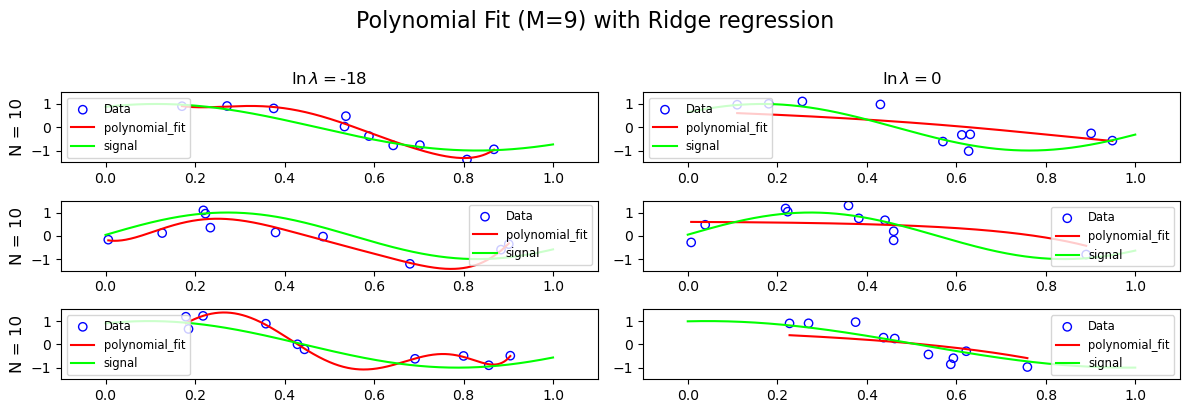

In [102]:
order = 9
N = [10, 10, 10]
ln_lambda = np.array([-18, 0])
fig, axs = plt.subplots(len(N), len(ln_lambda), figsize=(12, 4)) 

for i, n in enumerate(N):  # Enumerate over the degree array
    for j, element in enumerate(ln_lambda):
        x_data, y_data = data(n)
        #ridge fit function needs 2D arrays as arguments. So reshaped x_data and y_data (1D arrays) into 
        # x and y (2D arrays)
        x = x_data.reshape(-1,1)
        y = y_data.reshape(-1,1)
        poly = make_pipeline(PolynomialFeatures(order), Ridge(alpha=np.exp(element)))
        Fit = poly.fit(x, y)
        y = Fit.predict(x)
        #x_1D = x.reshape(-1)
        #y_1D = y.reshape(-1)
        #print(x.min())
        x_continuous = np.linspace(x.min(), x.max(), 500) #becomes 1D
        y_fit = Fit.predict(x_continuous.reshape(-1,1)) #Fit.predict needs 2D array, so x_continuous.reshape(-1,1)
        axs[i, j].scatter(x_data, y_data, facecolors='none', edgecolors='blue', marker='o', label='Data')
        axs[i, j].plot(x_continuous, y_fit.reshape(-1), c='red', label='polynomial_fit')
        axs[i, j].plot(np.linspace(0, 1, 500), np.sin(2*np.pi*x_continuous), c='lime', label='signal')
        #axs[i, j].set_title(f'N = {element}')
        #axs[i, j].set_xlabel('x_data')
        #axs[i, j].set_ylabel('t(target variable)')
        if i == 0:
            axs[i, j].set_title(f'$\ln \lambda = ${element}', fontsize=12)
        if j == 0:
            axs[i, j].set_ylabel(f"N = {n}", fontsize=12)
        axs[i, j].legend(fontsize='small', loc='best')
        axs[i, j].set_xlim([-0.1, 1.1])
        axs[i, j].set_ylim([-1.5, 1.5])
        axs[i, j].legend(fontsize='small', loc='best')

plt.suptitle("Polynomial Fit (M=9) with Ridge regression", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Analysis - 2

In [144]:
order = 9
N = 15
ln_lambda = np.array([float('-inf'), -80, -50, -30, -18, 0])

x_data, y_data = data(N)
#x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25) #25% of the
# data goes to the test set
n_train = int(N*0.25)
n_test = int(N*0.75)
x_train = x_data[n_train:]
y_train = y_data[n_train:]
x_test = x_data[:n_test]
y_test = y_data[:n_test]
train_rms = np.array([])
test_rms = np.array([])

for i, element in enumerate(ln_lambda):
    #training set
    x1 = x_train.reshape(-1,1)
    y1 = y_train.reshape(-1,1)
    poly_train = make_pipeline(PolynomialFeatures(order), Ridge(alpha=np.exp(element)))
    Fit_train = poly_train.fit(x1, y1) #give the fitted parameters/coefficinets
    y_pred1 = Fit_train.predict(x1)
    y_pred1_1D = y_pred1.reshape(-1)
    Error_rms_train = np.sqrt(mean_squared_error(y1, y_pred1))
    train_rms = np.append(train_rms, Error_rms_train)
    
    #test set
    x2 = x_test.reshape(-1,1)
    y2 = y_test.reshape(-1,1)
    poly_test = make_pipeline(PolynomialFeatures(order), Ridge(alpha=np.exp(element)))
    Fit_test = poly_test.fit(x2, y2) #give the fitted parameters/coefficients
    y_pred2 = Fit_test.predict(x2)
    y_pred2_1D = y_pred1.reshape(-1)
    Error_rms_test = np.sqrt(mean_squared_error(y2, y_pred2))
    test_rms = np.append(test_rms, Error_rms_test)
    
print(train_rms, test_rms)

[0.14689435 0.14749681 0.14749681 0.16336467 0.20729608 0.52142621] [0.04743682 0.0504214  0.0504214  0.05187763 0.15298547 0.41199808]


/home/labani-roy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.60077e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/labani-roy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.13526e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/labani-roy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.77931e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/labani-roy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.35049e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


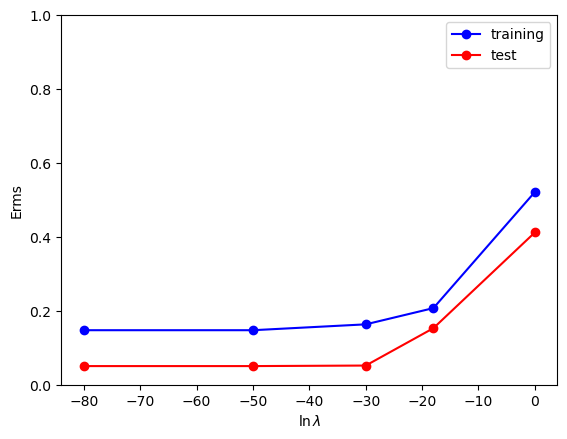

In [145]:
plt.plot(ln_lambda, train_rms, c = 'blue', marker='o', label="training")
plt.plot(ln_lambda, test_rms, c ='red', marker='o', label='test')

#plt.plot(order, train_rms, color="blue", linestyle='-', label='training')
#plt.plot(order, test_rms, color="red", linestyle='-', label='test')


plt.ylim(0, 1)
plt.xlabel('$\ln\lambda$')
plt.ylabel('Erms')
plt.legend()
plt.show()